In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("dirty_iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-6.4,3.2,4.5,1.5,versicolor
1,6.3,-3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


### 1) Calculate the number and % of observations that are complete.

In [6]:
check_nan_rows = list(data.isnull().sum(axis=1))
complete_rows_count = check_nan_rows.count(0)

print("Percentage: ", complete_rows_count/150*100)

Percentage:  64.0


### 2) replace all the special values in data with NA 

In [15]:
num = data._get_numeric_data()
num[num < 0] = None
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,NaN,3.2,4.5,1.5,versicolor
1,6.3,NaN,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


### 3) Define follwing rules

In [8]:
rules = [
         lambda x: True if x[5] in ('setosa','virginica','versicolor') else False, #is_valid_species
         lambda x: True if (x[1]>0 and x[2]>0 and x[3]>0 and x[4]>0) else False, #is_all_positive
         lambda x: True if 2*x[3] >= x[4] else False,  #is_length_double_width
         lambda x: True if x[1]<=30 else False, #is_sepal_length_30
         lambda x: True if x[1]>x[3] else False #is_sepal_gr_petal 
]

### 4) Determine how often each rule is broken. Also summarize and plot the results.

In [9]:
rules_voilation_count = [0 for i in range(5)]

for index, rule in enumerate(rules):
    for row in data.itertuples():
        result = rule(row)
        if not result:
            rules_voilation_count[index] += 1
            
        print("Rule{} on Row{} ".format(index,row[0]),result)
    print("=======================")

Rule0 on Row0  True
Rule0 on Row1  True
Rule0 on Row2  True
Rule0 on Row3  True
Rule0 on Row4  True
Rule0 on Row5  True
Rule0 on Row6  True
Rule0 on Row7  True
Rule0 on Row8  True
Rule0 on Row9  True
Rule0 on Row10  True
Rule0 on Row11  True
Rule0 on Row12  True
Rule0 on Row13  True
Rule0 on Row14  True
Rule0 on Row15  True
Rule0 on Row16  True
Rule0 on Row17  True
Rule0 on Row18  True
Rule0 on Row19  True
Rule0 on Row20  True
Rule0 on Row21  True
Rule0 on Row22  True
Rule0 on Row23  True
Rule0 on Row24  True
Rule0 on Row25  True
Rule0 on Row26  True
Rule0 on Row27  True
Rule0 on Row28  True
Rule0 on Row29  True
Rule0 on Row30  True
Rule0 on Row31  True
Rule0 on Row32  True
Rule0 on Row33  True
Rule0 on Row34  True
Rule0 on Row35  True
Rule0 on Row36  True
Rule0 on Row37  True
Rule0 on Row38  True
Rule0 on Row39  True
Rule0 on Row40  True
Rule0 on Row41  True
Rule0 on Row42  True
Rule0 on Row43  True
Rule0 on Row44  True
Rule0 on Row45  True
Rule0 on Row46  True
Rule0 on Row47  True
Ru

Rule3 on Row121  True
Rule3 on Row122  True
Rule3 on Row123  True
Rule3 on Row124  False
Rule3 on Row125  True
Rule3 on Row126  True
Rule3 on Row127  True
Rule3 on Row128  True
Rule3 on Row129  True
Rule3 on Row130  True
Rule3 on Row131  True
Rule3 on Row132  True
Rule3 on Row133  True
Rule3 on Row134  True
Rule3 on Row135  True
Rule3 on Row136  True
Rule3 on Row137  False
Rule3 on Row138  True
Rule3 on Row139  True
Rule3 on Row140  True
Rule3 on Row141  True
Rule3 on Row142  True
Rule3 on Row143  True
Rule3 on Row144  True
Rule3 on Row145  True
Rule3 on Row146  True
Rule3 on Row147  True
Rule3 on Row148  True
Rule3 on Row149  True
Rule4 on Row0  False
Rule4 on Row1  True
Rule4 on Row2  True
Rule4 on Row3  True
Rule4 on Row4  True
Rule4 on Row5  False
Rule4 on Row6  True
Rule4 on Row7  True
Rule4 on Row8  True
Rule4 on Row9  True
Rule4 on Row10  True
Rule4 on Row11  True
Rule4 on Row12  True
Rule4 on Row13  True
Rule4 on Row14  False
Rule4 on Row15  True
Rule4 on Row16  True
Rule4 on R

[0, 59, 32, 13, 31]


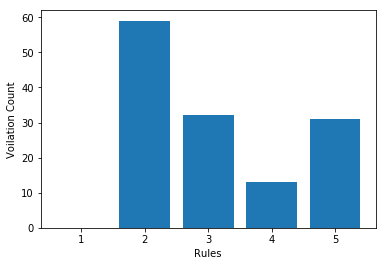

In [10]:
print(rules_voilation_count)

x = list(range(1,6))
y = rules_voilation_count


plt.bar(x,y)
plt.xlabel("Rules")
plt.ylabel("Voilation Count");

### 5) Find outliers in sepal length using boxplot and boxplot.stats

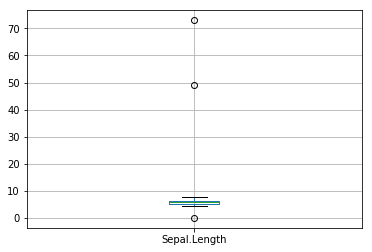

In [37]:
data[['Sepal.Length']].boxplot(return_type="dict")
plt.plot();